In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import array
from datetime import datetime

In [3]:
threshold = 62.5 #hypoxia for seawater in micromoles per kg
graphRes = 34
dateK = ''
dateJ = '1900-01-01'
t = []
pressureArray = []
j = 0
data = []

def createDataset():
    global dateJ
    global dateK
    global j
    global data
    fileList = createFileList()
    for fileName in fileList:
        data = np.genfromtxt(fileName, delimiter = ",", skip_header = 1, skip_footer = 0)
        a1 = len(data)
        j = 0
        k = 0
        while(k < a1 - 1):
            dateK = makeDate(int(data[k,1]))
            if((len(t) > 0) and (dateK == t[-1])):
                j = j + 1
            else:
                dateJ = dateK
                addNew(a1)
            k = j
            
    x_axis = a = array.array('i',(i for i in range(0,len(t))))
    n = []
    shownDates = []
    d = 0
    while(d < len(t)):
        n.append(d)
        shownDates.append(t[d])
        d = d + graphRes
    plt.figure(figsize=(20,12))
    plt.xticks(n, shownDates)
    plt.plot(x_axis, pressureArray)
    plt.title('Minimum Depth of Hypoxic Layer vs. Date')
    plt.xlabel('Date (YYYY-MM-DD)')
    plt.ylabel('Minimum Depth of Hypoxic Layer (m)')
    
def addNew(a2):
    global dateJ
    global dateK
    global j
    global data
    tempArray = []
    while((dateK == dateJ) and (j < a2 - 1)):
        if(data[j,11] <= threshold):
            tempArray.append(data[j,12])
        j = j + 1
        dateJ = makeDate(int(data[j,1]))
    if(len(tempArray) > 0):
        t.append(dateK)
        pressureArray.append(np.amin(tempArray))
            
def makeDate(timeStamp):
    deltaT = 2208988800
    ts = timeStamp - deltaT
    date = str(datetime.utcfromtimestamp(ts))
    dateArray1 = date.split(" ")
    date = dateArray1[0]
    return(date)
    
def createFileList():
    fileList = glob.glob('deployment*.*')
    fileList.sort()
    return fileList

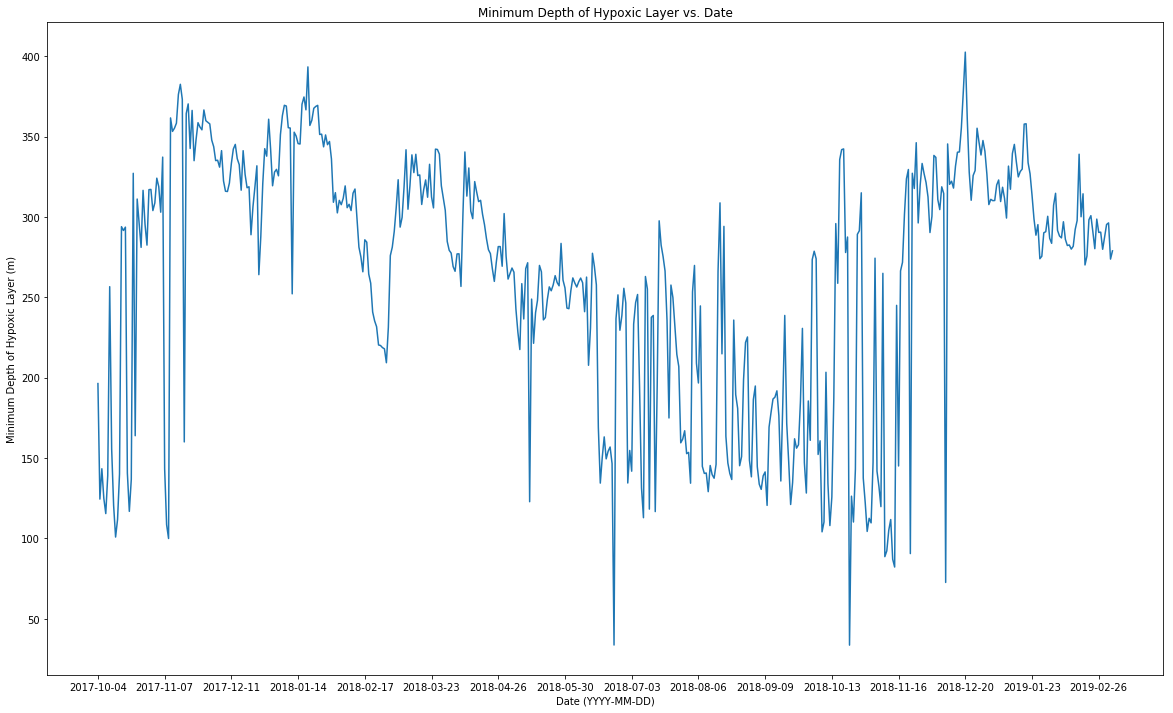

In [4]:
createDataset()